### Module: Unsupervised learning
### Name: Priyanka Balakrishna Hejmadi

## Part A 

PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

#### 1. Data Understanding & Exploration: [5 Marks]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
# A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]
car_name = pd.read_csv("Car_name.csv")

In [3]:
# B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]
car_attr = pd.read_json("Car-Attributes.json")

In [4]:
car_attr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
car_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [6]:
car_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [7]:
car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [8]:
# C. Merge both the DataFrames together to form a single DataFrame [2 Mark]
frames=[car_name, car_attr]
auto_df= pd.concat(frames, axis=1, ignore_index=False)
auto_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
# D. Print 5 point summary of the numerical features and share insights. [1 Marks]
auto_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Insights: The numerical values are in different scales from tens to hundreds and thousands. The multi-valued discrete features are also shown  as numerical values when they are actually categorical.

#### 2. Data Preparation & Analysis: [10 Marks]

In [10]:
# A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]
car_attr[~car_attr.applymap(np.isreal).all(1)]    # Since Car_attr contains  all the  numeric values we check for missing values there.

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [11]:
auto_df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [12]:
# There are no missing values but there are a few non-numeric values in hp column.

In [13]:
# B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]
auto_df[auto_df.duplicated(['car_name'])].sort_values(by='car_name')

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
315,amc concord,24.3,4,151.0,90,3003,20.1,80,1
169,amc gremlin,20.0,6,232.0,100,2914,16.0,75,1
33,amc gremlin,19.0,6,232.0,100,2634,13.0,71,1
107,amc gremlin,18.0,6,232.0,100,2789,15.0,73,1
127,amc hornet,19.0,6,232.0,100,2901,16.0,74,1
...,...,...,...,...,...,...,...,...,...
210,toyota mark ii,19.0,6,156.0,108,2930,15.5,76,3
172,volkswagen dasher,25.0,4,90.0,71,2223,16.5,75,2
240,volkswagen dasher,30.5,4,97.0,78,2190,14.1,77,2
203,volkswagen rabbit,29.5,4,97.0,71,1825,12.2,76,2


Insights: On close inspection, the duplicate values are formed when a car is relaunched as a new version in different years.Even though the name is duplicate, the other columns have changed. Hence it would be better to rename the car with its launch year instead of just dropping the rows.

In [14]:
auto_df['car_name'] = auto_df['car_name'] + ' ' + auto_df['yr'].astype(str)

In [15]:
auto_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu 70,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320 70,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite 70,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst 70,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino 70,17.0,8,302.0,140,3449,10.5,70,1


In [16]:
auto_df['car_name'].nunique()

396

In [17]:
auto_df.drop_duplicates(subset=['car_name'],inplace=True)

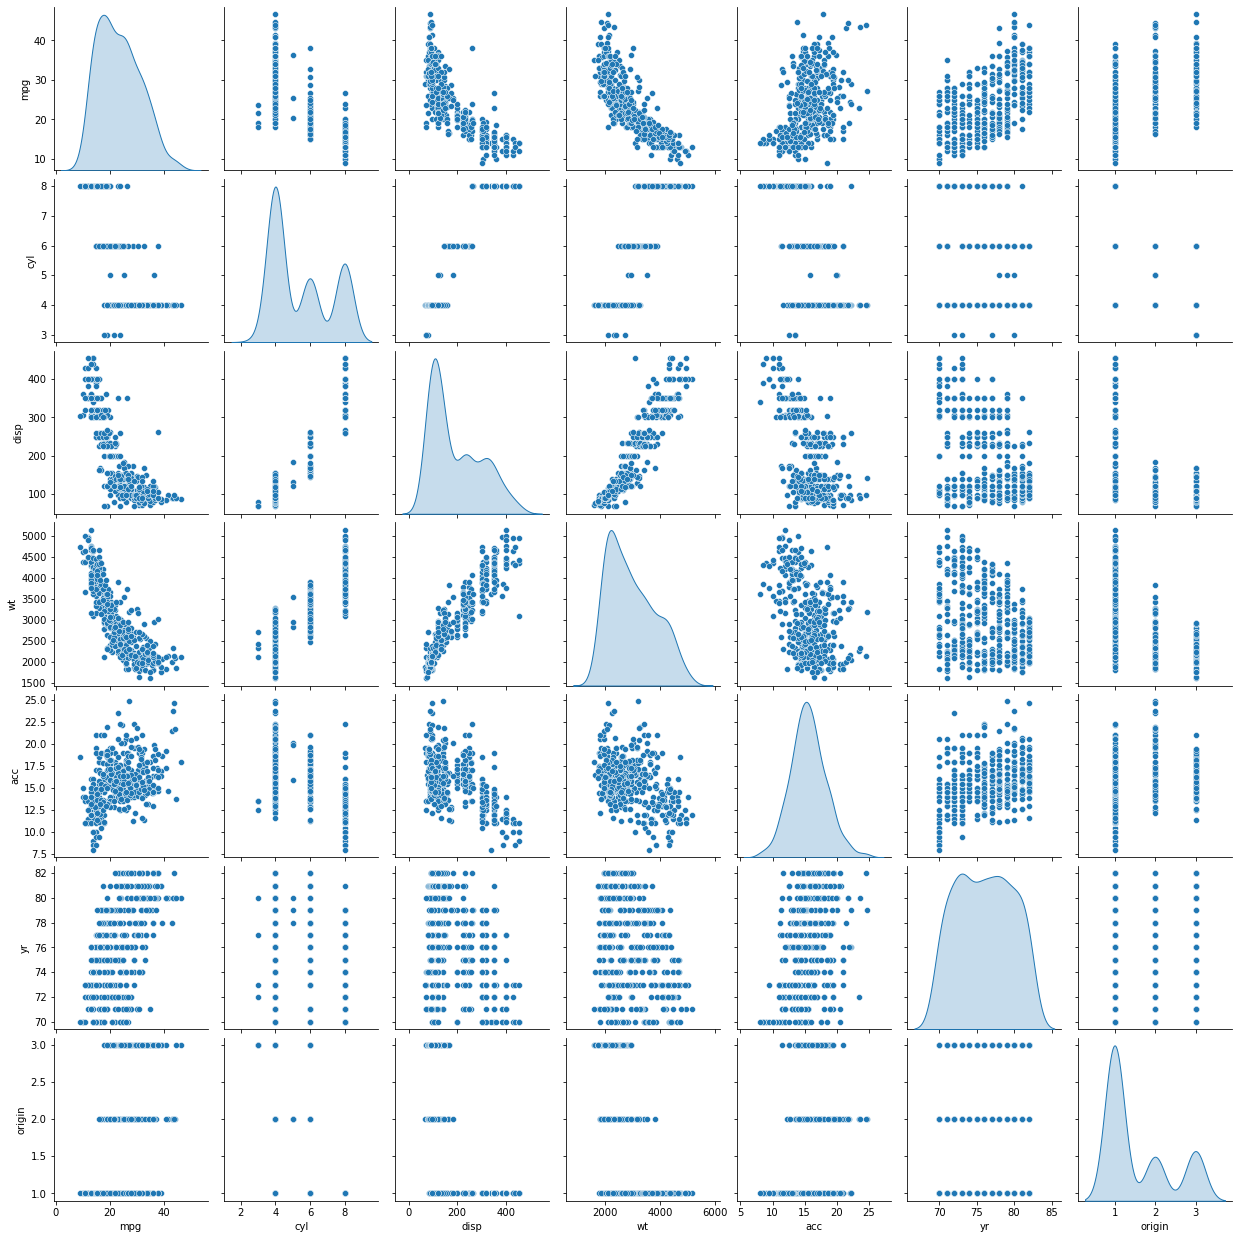

In [18]:
# C. Plot a pairplot for all features. [1 Marks]
sns.pairplot(auto_df, diag_kind='kde');

Text(0.5, 1.0, 'Scatterplot of weight vs displacement')

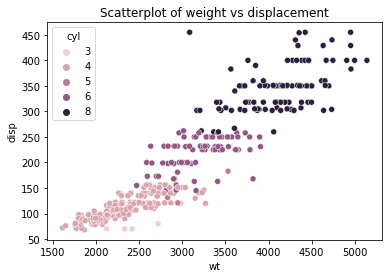

In [19]:
# D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]
sns.scatterplot(data=auto_df, x= 'wt', y='disp', hue='cyl');
plt.title('Scatterplot of weight vs displacement')

#### E. Share insights for Q2.d. [1 Marks]
Insights: From the above plot we see a positive correlation between weight and displacement. Moreover, we can cluster the datapoints on the basis of the number of cylinders. Fewer cylinders gives less displacement and also has less weight and vice versa.

Text(0.5, 1.0, 'Scatterplot of weight vs miles per gallon')

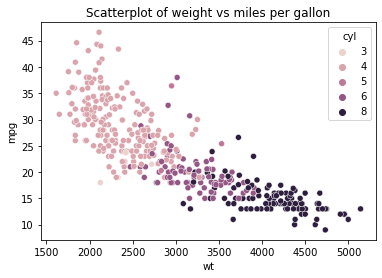

In [20]:
# F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]
sns.scatterplot(data=auto_df, x= 'wt', y='mpg', hue='cyl');
plt.title('Scatterplot of weight vs miles per gallon')

#### G. Share insights for Q2.f. [1 Marks]
Insights: There is a negative  correlation between miles per gallon and weight. Lesser number and cylinders contributes to better mileage (mpg).

In [21]:
# H. Check for unexpected values in all the features and datapoints with such values. [2 Marks] 
car_attr[~car_attr.applymap(np.isreal).all(1)] 

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [22]:
auto_df.replace('?', np.nan ,inplace=True)
auto_df['hp']=auto_df['hp'].fillna(auto_df['hp'].mean())

#### 3. Clustering: [15 Marks]

In [23]:
auto_df['cyl']= auto_df['cyl'].astype('category')
auto_df['yr']= auto_df['yr'].astype('category')
auto_df['origin']= auto_df['origin'].astype('category')

In [24]:
auto_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu 70,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320 70,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite 70,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst 70,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino 70,17.0,8,302.0,140.0,3449,10.5,70,1


In [25]:
# A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]
from scipy.stats import zscore
auto_df.drop(['car_name'], inplace= True, axis=1) # Since we are applying KMeans we do not need the car names anymore.
for feature in auto_df.columns:
    if  auto_df[feature].dtype != 'category':
        auto_df[feature]= zscore(auto_df[feature])


#auto_scaled = auto_df.apply(zscore) 

In [26]:
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.705403,8,1.086399,0.665914,0.627959,-1.297440,70,1
1,-1.089322,8,1.498459,1.581386,0.850994,-1.478772,70,1
2,-0.705403,8,1.191810,1.189040,0.547713,-1.660104,70,1
3,-0.961349,8,1.057651,1.189040,0.544173,-1.297440,70,1
4,-0.833376,8,1.038486,0.927477,0.563054,-1.841436,70,1


In [27]:
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(auto_df)
    prediction=model.predict(auto_df)
    meanDistortions.append(sum(np.min(cdist(auto_df, model.cluster_centers_, 'euclidean'), axis=1)) / auto_df.shape[0])


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

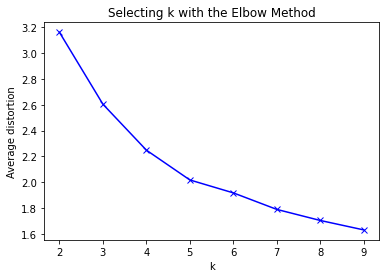

In [28]:
# B. Plot a visual and find elbow point. [2 Marks]
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

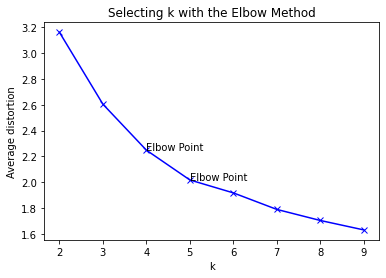

In [29]:
# C. On the above visual, highlight which are the possible Elbow points. [1 Marks]
plt.plot(clusters, meanDistortions, 'bx-')
plt.text(clusters[2], meanDistortions[2],"Elbow Point")
plt.text(clusters[3], meanDistortions[3],"Elbow Point")
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [30]:
# D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]
final_model= KMeans(5)
final_model.fit(auto_df)
prediction=final_model.predict(auto_df)

In [31]:
# E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]
auto_df['GROUP'] = prediction
print("Groups:")
auto_df.sample(20)

Groups:


,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
309,2.301964,4,-0.916402,-0.746529,-0.976953,-0.318247,80,2,1
221,-0.769390,8,1.067234,1.058259,1.071670,-1.116108,77,1,2
301,1.367760,4,-0.849322,-0.903467,-0.910869,-0.862243,79,1,1
74,-1.345268,8,1.038486,0.927477,1.560224,0.153216,72,1,4
61,-0.321484,4,-0.686415,-0.484965,-0.880187,0.334548,72,1,0
268,0.471949,4,-0.715163,-0.197246,-0.792861,-0.318247,78,3,3
153,-0.705403,6,0.540181,0.012005,0.574855,0.153216,75,1,2
275,-0.833376,6,-0.293521,0.535132,0.198409,-0.717177,78,2,2
290,-1.025336,8,1.508042,0.979790,1.277004,-0.463312,79,1,2
171,0.062435,4,-0.571422,-0.223402,-0.318467,-0.753444,75,3,3


In [32]:
# D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]
final_model= KMeans(4)
final_model.fit(auto_df)
prediction=final_model.predict(auto_df)

In [33]:
# E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]
auto_df_cluster=auto_df.copy()
auto_df_cluster['GROUP'] = prediction
print("Groups:")
auto_df_cluster.sample(20)

Groups:


,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
259,-0.347078,6,0.061042,-0.511122,0.115803,0.407081,78,1,0
120,-0.577430,4,-0.695998,0.195099,-0.122574,-0.028116,73,2,1
213,-1.345268,8,1.498459,1.058259,1.278184,-1.297440,76,1,0
110,-0.193511,4,-0.820574,-0.275715,-0.699634,0.334548,73,3,1
0,-0.705403,8,1.086399,0.665914,0.627959,-1.297440,70,1,3
52,0.830274,4,-1.012230,-0.746529,-1.070180,-0.390780,71,2,1
148,0.318381,4,-0.743912,-0.772685,-0.856585,-0.572112,74,2,1
356,1.137409,4,-0.820574,-0.772685,-0.733856,0.443348,81,3,2
385,1.854058,4,-0.983481,-0.981936,-1.152786,0.225749,82,3,2
24,-0.321484,6,0.051459,-0.380340,-0.382192,-0.209448,70,1,1


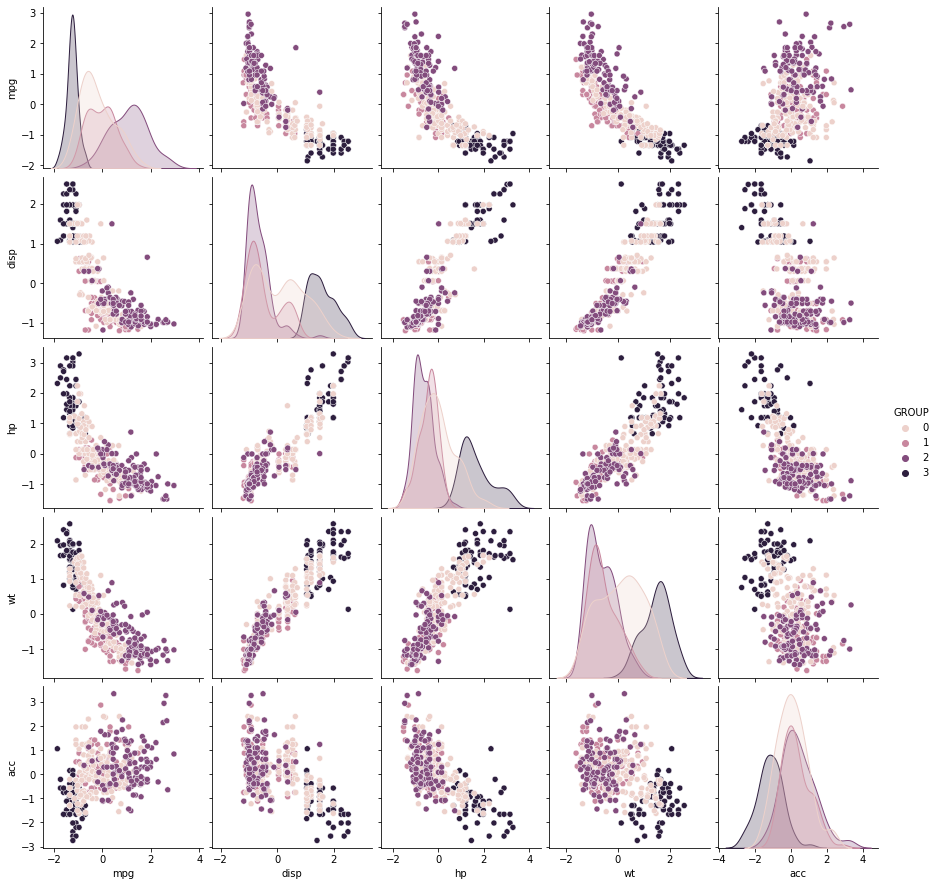

In [34]:
# F. Plot a visual and color the datapoints based upon clusters. [2 Marks]
sns.pairplot(auto_df_cluster,hue='GROUP')

<AxesSubplot:xlabel='wt', ylabel='yr'>

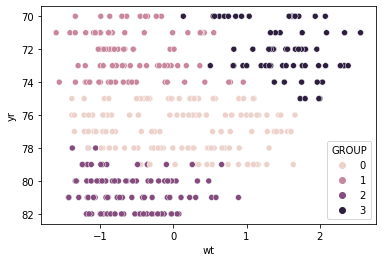

In [35]:
sns.scatterplot(data= auto_df_cluster, x='wt', y='yr', hue='GROUP')

In [36]:
# G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]
final_prediction = final_model.predict(auto_df.sample(1))
print("Group",final_prediction)

Group [1]


## Part B

PROJECT OBJECTIVE: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles. 

Apply dimensionality reduction technique – PCA and train a model and compare relative results.

#### 1. Data Understanding and Cleaning.

In [37]:
# A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [38]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [39]:
vehicle_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [40]:
# B. Check percentage of missing values and impute with correct approach. [1 Marks]
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [41]:
y= vehicle_df['class']
vehicle_df.drop(['class'], axis=1,inplace=True)

In [42]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(vehicle_df)

SimpleImputer()

In [43]:
vehicle_df= pd.DataFrame(imp_mean.transform(vehicle_df),columns=vehicle_df.columns)

In [44]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [45]:
vehicle_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.133943,15.740902,33.400979,7.882119,4.601217,33.195188,7.811559,2.588326,14.515652,31.355195,176.457706,32.546223,7.468450,4.903148,8.930792,6.152166,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


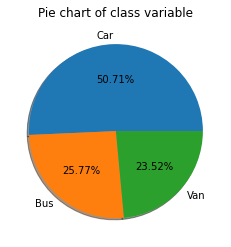

In [46]:
# C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]
labels= ['Car','Bus','Van']
plt.pie(y.value_counts(),labels=labels, autopct='%1.2f%%', shadow= True);
plt.title("Pie chart of class variable");

In [47]:
# D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]
vehicle_df[vehicle_df.duplicated(keep='last')]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio


In [48]:
vehicle_df.duplicated(keep='last').sum()

0

There are no duplicate values in the dataset.

#### 2. Data Preparation

In [49]:
# A. Split data into X and Y. [Train and Test optional] [1 Marks]
X= vehicle_df.copy()
Y=y.copy()

In [50]:
X.shape

(846, 18)

In [51]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0


In [52]:
XScaled = X.apply(zscore)

In [53]:
Y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( XScaled, Y, test_size=0.2, random_state=2)

#### 3. Model Building: [13 Marks]

In [55]:
# A. Train a base Classification model using SVM. [1 Marks]
from sklearn import svm
clf= svm.SVC(gamma=0.025, C=3)


In [56]:
clf.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [57]:
y_pred=clf.predict(X_test)

In [58]:
# B. Print Classification metrics for train data. [1 Marks]
y_train_pred= clf.predict(X_train)

In [59]:
clf.score(X_train, y_train)

0.9807692307692307

In [60]:
from sklearn import metrics
labs=['car','van','bus']
cm= metrics.confusion_matrix(y_test,y_pred,labels=labs)
df_cm= pd.DataFrame(cm, index= [i for i in labs], columns = [i for i in labs])

<AxesSubplot:>

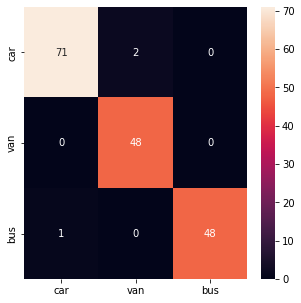

In [61]:
plt.figure(figsize=(5,5))
sns.heatmap(df_cm,annot=True)

Insights: The classification model does a good job of classifying test data.

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labs))

              precision    recall  f1-score   support

         car       1.00      0.98      0.99        49
         van       0.99      0.97      0.98        73
         bus       0.96      1.00      0.98        48

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



In [63]:
# C. Apply PCA on the data with 10 components. [3 Marks]
from sklearn.decomposition import PCA
covMatrix= np.cov(XScaled,rowvar = False)

In [64]:
pca= PCA(n_components=10)
pca.fit(X_train)

PCA(n_components=10)

In [65]:
print(pca.explained_variance_)

[9.5556453  3.10962308 1.67354039 1.15887283 0.91144863 0.51188162
 0.35617326 0.21624435 0.16096664 0.09510531]


In [66]:
print(pca.components_)

[[ 0.2772526   0.2925605   0.30798253  0.26758237  0.07912759  0.0965885
   0.31476164 -0.31436135  0.31248577  0.28202163  0.30709545  0.31238503
   0.27080689 -0.02906434  0.05524489  0.05328737  0.03852918  0.08345413]
 [-0.12343009  0.13145666 -0.06845538 -0.19088481 -0.1258668   0.0111189
   0.05317118  0.00665346  0.06603491  0.12481941  0.0635677   0.0575671
   0.21584028  0.48564027 -0.05505397 -0.13269035 -0.54000051 -0.53437482]
 [-0.12540089 -0.01812882 -0.05526452  0.28574132  0.66802915  0.54853306
  -0.09400977  0.04595655 -0.10829542 -0.01800045  0.05547562 -0.10625336
  -0.02843276  0.28755189 -0.13824786 -0.10435713  0.00825215  0.03402433]
 [ 0.07371325  0.18903282 -0.06710805 -0.04970519  0.02509328  0.04385653
  -0.10551065  0.09265618 -0.10193722  0.19364377 -0.13101468 -0.10403989
   0.1951941  -0.06621287  0.63072038 -0.6322276   0.10487441  0.05202318]
 [ 0.07249338 -0.09804202  0.01366887 -0.02513151  0.01678817  0.19566806
  -0.01208162  0.06751223  0.00306621

In [67]:
print(pca.explained_variance_ratio_)

[0.53171784 0.17303301 0.0931231  0.06448475 0.05071698 0.02848333
 0.01981904 0.01203278 0.00895689 0.00529207]


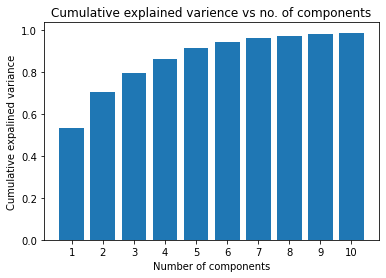

In [68]:
# D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]
plt.bar(list(range(1,11)), np.cumsum(pca.explained_variance_ratio_),align='center');
plt.xlabel("Number of components");
plt.xticks(range(1,11));
plt.ylabel("Cumulative expalined variance");
plt.title("Cumulative explained varience vs no. of components");

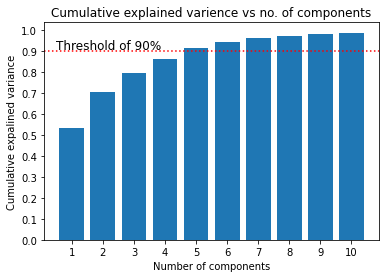

In [69]:
# E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]
plt.bar(list(range(1,11)), np.cumsum(pca.explained_variance_ratio_),align='center');
plt.xlabel("Number of components");
plt.xticks(range(1,11));
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel("Cumulative expalined variance");
plt.title("Cumulative explained varience vs no. of components");
threshold=0.9
plt.axhline(threshold, color='red', ls='dotted');
plt.text(0.5,0.91,"Threshold of 90%", fontsize=12);

In [70]:
Xpca10= pca.transform(X_train)

In [71]:
Xpca10[1]

array([-2.64571333, -3.10765321,  0.23520852,  0.29915757, -1.19798412,
       -0.33479614,  0.40550222, -0.02596618,  0.52127477,  0.30992472])

In [72]:
# F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]
# The minimunm components for 90% varince was 5. Hence we fit the data with PCA=5
pca5= PCA(n_components=5)
pca5.fit(X_train)
Xpca5= pca5.transform(X_train)


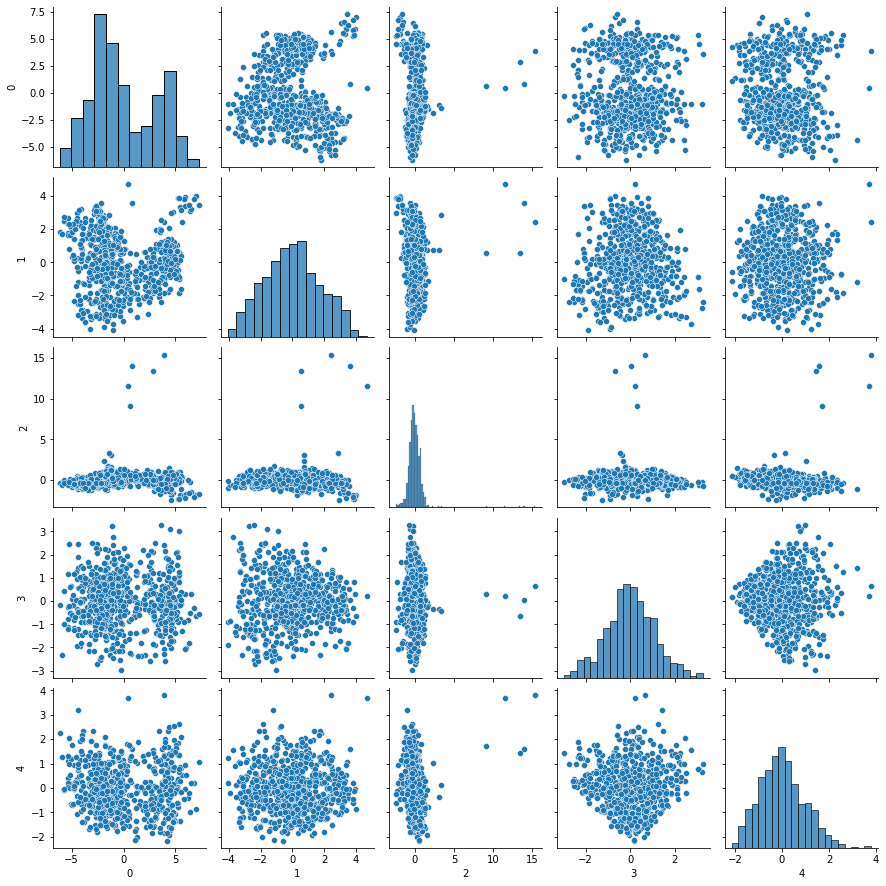

In [73]:
sns.pairplot(pd.DataFrame(Xpca5))

In [74]:
# G. Train SVM model on components selected from above step. [1 Marks]
svm_pca5_model = svm.SVC(gamma=0.025, C=3)
svm_pca5_model.fit(Xpca5,y_train)

SVC(C=3, gamma=0.025)

In [75]:
# H. Print Classification metrics for train data of above model and share insights. [2 Marks]
svm_pca5_model.score(Xpca5,y_train)

0.7914201183431953

Insights: The pca model with 5 components performs porrly compared to the previous model with the original components.

#### 4. Performance Improvement: [5 Marks]

In [76]:
# A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]
svm_pca10_model = svm.SVC(gamma=0.025, C=3)
svm_pca10_model.fit(Xpca10,y_train)

SVC(C=3, gamma=0.025)

In [77]:
svm_pca10_model.score(Xpca10,y_train)

0.9674556213017751

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
tuned_parameters={
    'gamma':[0.025,0.05,0.5],
    'C':[1,2,3,4,5],
    'kernel':['rbf','linear']
}

In [80]:
from sklearn.svm import SVC
svm_model=SVC()
model_svm =  GridSearchCV(svm_model, tuned_parameters, cv=10, scoring= 'accuracy',return_train_score=True)
model_svm.fit(Xpca10,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'gamma': [0.025, 0.05, 0.5],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='accuracy')

In [81]:
# B. Share best Parameters observed from above step. [1 Marks]
print(model_svm.best_params_)

{'C': 5, 'gamma': 0.05, 'kernel': 'rbf'}


In [83]:
# C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]
print(model_svm.best_score_)

0.9616549604916592


In [84]:
results=pd.DataFrame(model_svm.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010476,0.000496,0.002293,0.000458,1,0.025,rbf,"{'C': 1, 'gamma': 0.025, 'kernel': 'rbf'}",0.926471,0.941176,...,0.949013,0.950658,0.944079,0.957237,0.952381,0.950739,0.950739,0.945813,0.951020,0.004267
1,0.008080,0.000537,0.000793,0.000397,1,0.025,linear,"{'C': 1, 'gamma': 0.025, 'kernel': 'linear'}",0.852941,0.838235,...,0.912829,0.921053,0.917763,0.911184,0.914614,0.903120,0.917898,0.914614,0.913873,0.004584
2,0.009076,0.000288,0.002297,0.000463,1,0.05,rbf,"{'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}",0.970588,0.941176,...,0.972039,0.958882,0.972039,0.963816,0.970443,0.963875,0.968801,0.962233,0.966141,0.004237
3,0.008179,0.000406,0.000598,0.000488,1,0.05,linear,"{'C': 1, 'gamma': 0.05, 'kernel': 'linear'}",0.852941,0.838235,...,0.912829,0.921053,0.917763,0.911184,0.914614,0.903120,0.917898,0.914614,0.913873,0.004584
4,0.022838,0.000536,0.003491,0.000498,1,0.5,rbf,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",0.941176,0.911765,...,0.995066,0.993421,0.995066,0.993421,0.986864,0.988506,0.991790,0.990148,0.991619,0.003154


Insights: The final model gives an accuracy of about 96% on the test data which is a very close to the previous scores on the training   data. The model is not overfitting on the train data.

#### 5. Data Understanding & Cleaning: [5 Marks]

A. Explain pre-requisite/assumptions of PCA. [2 Marks]

The assumptions of PCA are:

1. The components of the dataframe are linear combinations of one another.
2. The components with large variance are more important.
3. There have to be multiple variables measured at continuious levels.
4. Sample sizes need to be large enough to produce good results.
5. There should be no significant outliers.
6. All the features need to be normalized/scaled.

B. Explain advantages and limitations of PCA. [3 Marks]

Advantages:
1. PCA is easy to compute.
2. SIgnificantly reduces the computation time for model building due to fewer features.
3. Prevents overfitting of train data.

Disadvantages:
1. Some information is lost while choosing the principal components.
2. It is hard to interpret the features formed as a result of PCA.